In [2]:
import pennylane as qml
from pennylane import numpy as pnp

In [10]:
num_qubits = 1

In [11]:
def ansatz(params, wires):
        qml.RY(params, wires=wires)

# Device
dev = qml.device('default.qubit', wires=2*num_qubits+1)

#Swap test to calculate overlap
@qml.qnode(dev)
def swap_test(params1, params2):

    ancilla = 2*num_qubits
    qml.Hadamard(wires=ancilla)

    ansatz(params1, wires=0)
    ansatz(params2, wires=1)

    qml.Barrier()
    for i in range(num_qubits):
        qml.CSWAP(wires=[ancilla, i, num_qubits + i])

    qml.Hadamard(wires=ancilla)

    prob = qml.probs(wires=ancilla)

    return prob

In [12]:
params = [0.032313]
print(qml.draw(swap_test)(params,params))

0: ──RY(M0)──||─╭SWAP────┤       
1: ──RY(M0)──||─├SWAP────┤       
2: ──H───────||─╰●─────H─┤  Probs

M0 = 
[0.032313]


(<Figure size 700x400 with 1 Axes>, <Axes: >)

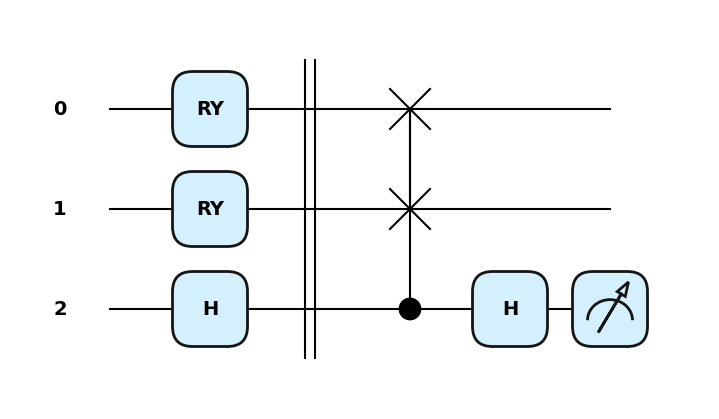

In [15]:
qml.draw_mpl(swap_test, style="pennylane")(params,params)
